# Finding the Best Machine Learning Regressor for the dataset : 

In [1]:
import pandas as pd
import numpy as np

import lazypredict
from lazypredict.Supervised import LazyRegressor

import matplotlib.pyplot as plt

from utility_functions import metrics

import warnings
warnings.filterwarnings("ignore")

## Importing the data : 

In [2]:
dataset = pd.read_csv('dataset.csv',parse_dates=[0], index_col=0)

In [3]:
dataset.head()
# dataset

,DE_wind_generation_actual,DE_solar_generation_actual,v1,v2,v_50m,h1,h2,z0,SWTDN,SWGDN,...,humidity,dew,windspeed,winddir,pressure,visibility,cloudcover,conditions,skyType,total_renewable_generation
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,8579,0,2.62,3.71,5.13,2.55,10.55,0.16,0.00,0.00,...,100.00,1.90,4.40,180.00,NaN,0.40,98.40,Overcast,1.00,8579
2016-01-01 01:00:00+00:00,8542,0,2.56,3.63,4.98,2.55,10.55,0.16,0.00,0.00,...,93.62,1.90,5.60,196.00,NaN,0.30,59.20,Partially cloudy,2.00,8542
2016-01-01 02:00:00+00:00,8443,0,2.48,3.52,4.79,2.55,10.55,0.16,0.00,0.00,...,94.10,2.00,6.70,230.00,NaN,1.10,98.40,Overcast,1.00,8443
2016-01-01 03:00:00+00:00,8295,0,2.40,3.40,4.66,2.55,10.55,0.16,0.00,0.00,...,94.06,1.10,5.10,218.00,NaN,1.30,98.40,Overcast,1.00,8295
2016-01-01 04:00:00+00:00,7319,0,2.31,3.29,4.57,2.55,10.55,0.16,0.00,0.00,...,93.61,1.00,1.90,202.00,NaN,2.10,13.80,Clear,0.00,7319


## Splitting the data into train and test datasets : 

- Distribution of the dataset : 
    - 70% of the dataset for Training (Train)
    - 30% of the dataset for Testing (Test)

In [4]:
train = dataset[:6098] 
test = dataset[6098:] 

X_solar_train = train[['SWTDN', 'SWGDN', 'T']]
y_solar_train = train['DE_solar_generation_actual']
X_solar_test = test[['SWTDN', 'SWGDN', 'T']]
y_solar_test = test['DE_solar_generation_actual']

X_wind_train = train[['v1', 'v2', 'v_50m', 'z0']]
y_wind_train = train['DE_wind_generation_actual']
X_wind_test = test[['v1', 'v2', 'v_50m', 'z0']]
y_wind_test = test['DE_wind_generation_actual']

## Applying LazyRegressor on Solar Dataset : 

In [5]:
solar_reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = solar_reg.fit(X_solar_train, X_solar_test, y_solar_train, y_solar_test)

models

100%|██████████| 42/42 [00:26<00:00,  1.57it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 6098, number of used features: 3
[LightGBM] [Info] Start training from score 4705.408331


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.93,0.93,1075.28,0.31
LGBMRegressor,0.93,0.93,1075.40,0.13
XGBRegressor,0.93,0.93,1076.63,0.14
PassiveAggressiveRegressor,0.93,0.93,1091.96,0.03
RANSACRegressor,0.93,0.93,1093.64,0.04
HuberRegressor,0.93,0.93,1098.57,0.05
RandomForestRegressor,0.93,0.93,1108.30,1.98
OrthogonalMatchingPursuitCV,0.93,0.93,1113.42,0.02
LassoLarsIC,0.93,0.93,1113.42,0.02


## Applying LazyRegressor for Wind Dataset : 

In [6]:
wind_reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = wind_reg.fit(X_wind_train, X_wind_test, y_wind_train, y_wind_test)

models

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:27<00:00,  1.52it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 6098, number of used features: 4
[LightGBM] [Info] Start training from score 8334.015087


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.90,0.90,2383.22,1.13
ExtraTreesRegressor,0.90,0.90,2393.15,1.30
HistGradientBoostingRegressor,0.90,0.90,2407.20,0.41
RandomForestRegressor,0.90,0.90,2429.93,2.55
BaggingRegressor,0.89,0.89,2450.03,0.35
LGBMRegressor,0.89,0.89,2451.60,0.08
XGBRegressor,0.88,0.88,2618.13,0.16
KNeighborsRegressor,0.88,0.88,2647.33,0.04
SGDRegressor,0.88,0.88,2650.90,0.06


### End Results :

- For solar dataset : 
    - Best : **HistGradientBoostingRegressor**
    - Worst : **Kernel Ridge**
- For wind dataset : 
    - Best : **GradientBoostingRegressor** 
    - Worst : **GaussianProcessRegressor**

## Cross-validation over **Solar** Dataset : 

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor()

In [8]:
X_solar = dataset[['SWTDN', 'SWGDN', 'T']]
y_solar = dataset['DE_solar_generation_actual']

scores_solar = cross_val_score(hgbr, X_solar, y_solar, cv=5)
print(scores_solar, "\nAverage Score for Solar Predictions = ", np.mean(scores_solar) * 100, "%")

[0.85807896 0.94661228 0.94447233 0.95746803 0.88008925] 
Average Score for Solar Predictions =  91.73441664489002 %


## Actual vs Predicted Values Plot **[Solar]** : 

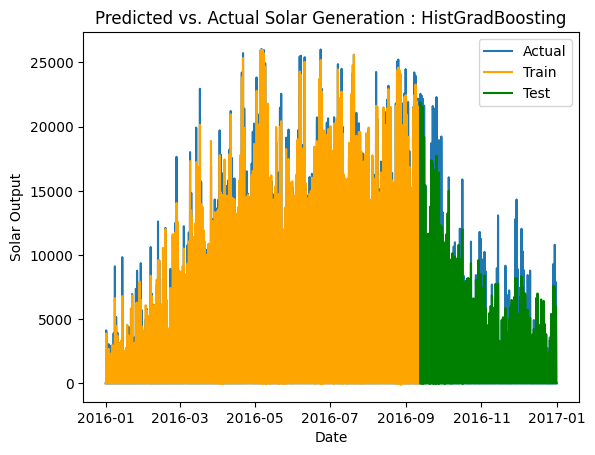

In [9]:
hgbr = HistGradientBoostingRegressor().fit(X_solar_train, y_solar_train)

train_solar_pred = hgbr.predict(X_solar_train)
test_solar_pred = hgbr.predict(X_solar_test)

df = dataset[['DE_solar_generation_actual']]

train_df = train[['DE_solar_generation_actual']]
train_df.loc[:, 'DE_solar_generation_actual'] = train_solar_pred

test_df = test[['DE_solar_generation_actual']]
test_df.loc[:, 'DE_solar_generation_actual'] = test_solar_pred

inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')

plt.xlabel('Date')
plt.ylabel('Solar Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual Solar Generation : HistGradBoosting")
plt.show()

### Regression Metrics for **SOLAR** : 

In [10]:
metrics('histgrad', test['DE_solar_generation_actual'], test_solar_pred)

,MAE,MSE,RMSE,RMSLE,R2
model,,,,,
histgrad,465.13,1156222.81,1075.28,6.98,0.93


## Cross-validation over **Wind** Dataset : 

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

In [12]:
X_wind = dataset[['v1', 'v2', 'v_50m', 'z0']]
y_wind = dataset['DE_wind_generation_actual']

scores_wind = cross_val_score(gbr, X_wind, y_wind, cv=5)
print(scores_wind, "\nAverage Score for Wind Predictions = ", np.mean(scores_wind) * 100, "%")

[0.89898565 0.85054644 0.87555831 0.92984509 0.88913129] 
Average Score for Wind Predictions =  88.881335682128 %


## Actual vs Predicted Values Plot **[Wind]** : 

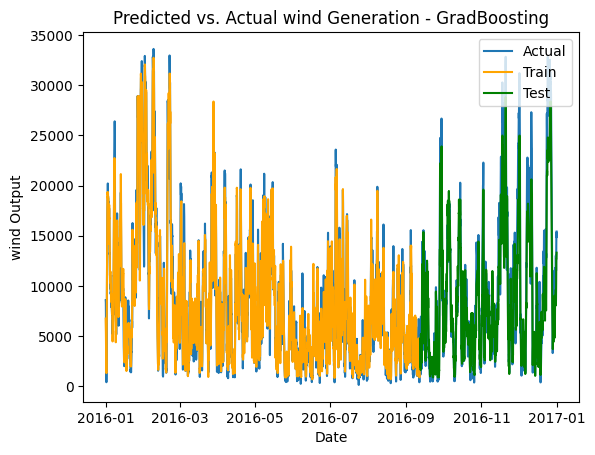

In [13]:
gbr = GradientBoostingRegressor().fit(X_wind_train, y_wind_train)

train_wind_pred = gbr.predict(X_wind_train)
test_wind_pred = gbr.predict(X_wind_test)

df = dataset[['DE_wind_generation_actual']]

train_df = train[['DE_wind_generation_actual']]
train_df.loc[:, 'DE_wind_generation_actual'] = train_wind_pred

test_df = test[['DE_wind_generation_actual']]
test_df.loc[:, 'DE_wind_generation_actual'] = test_wind_pred

inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')

plt.xlabel('Date')
plt.ylabel('wind Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual wind Generation - GradBoosting")
plt.show()

### Regression Metrics for **WIND**

In [14]:
metrics('grad', test['DE_wind_generation_actual'], test_wind_pred)

,MAE,MSE,RMSE,RMSLE,R2
model,,,,,
grad,1684.61,5634763.49,2373.77,7.77,0.90


## Result :

By using LazyRegressor, we were able to accurately decide which model would be the most appropirate for the prediction of solar and wind energy predictions : 
- Accurcay of Solar Energy Predictions were increased to : 91.73% (approx.)
- Accurcay of Wind Energy Predictions were increased to : 90% (approx.)

## Conclusion : 
- We have seen that due to variating nature of the way Wind and Solar produce their energy. These cannot be captured in a single model.
- Different models for solar and wind are required.
- So a combined model that captures the output their predictions seperately and combines them, could result in better accuracy.